# Summary of Uses of regionprops with Examples

### Kaleb Decker
### October 26th, 2020
### MVP Team; Nance Lab; University of Washington


#### Purpose: Identify uses of RegionProps for use in astrocyte analysis in the future


regionprops is a module from skimage that allows us to measure labeled objects in an image. Some examples of its uses are the following:

**area**: number of pixels in a region

**centroid**: finds the centroid coordinate of the object

**filled_area**: find the number of pixels in a region with all teh wholes filled in

**label**: returns the label for the labeled input image

**major_axis_length**: the length of the major axis of the ellipse that has the same normalized second central moments as the region

**max_intensity**: value with the greatest intensity in the region

**perimeter**: approximates a contour line through the centers of the border pixels

and among others.

*Step 1: Import skimage and example data*

In [18]:
from skimage import data, util
from skimage.measure import label, regionprops
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patches as mpatches

*Step 2: Example Code 1: Finding the centroid* 

In [19]:
img = util.img_as_ubyte(data.coins()) > 110
label_img = label(img, connectivity=img.ndim)
props = regionprops(label_img)
# centroid of first labeled object
props[0].centroid
(22.72987986048314, 81.91228523446583)
# centroid of first labeled object
props[0]['centroid']
(22.72987986048314, 81.91228523446583)

(22.72987986048314, 81.91228523446583)

*Step 3: Visualizing the image*

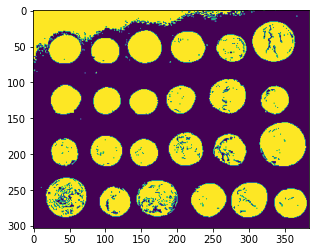

In [20]:
imgplot = plt.imshow(img)

Example 2: Thresholding and labeling

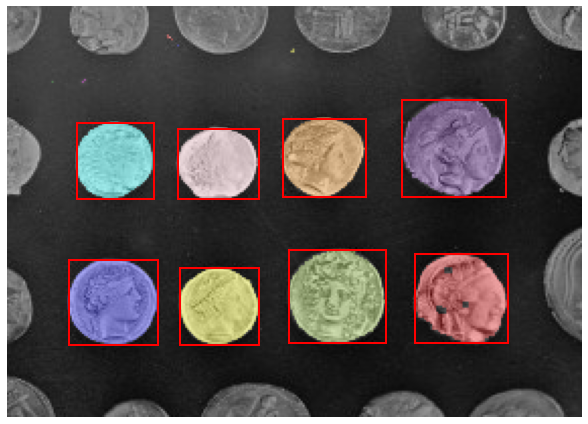

In [21]:
from skimage.filters import threshold_otsu
from skimage.segmentation import clear_border
from skimage.measure import label, regionprops
from skimage.morphology import closing, square
from skimage.color import label2rgb


image = data.coins()[50:-50, 50:-50]

# apply threshold
thresh = threshold_otsu(image)
bw = closing(image > thresh, square(3))

# remove artifacts connected to image border
cleared = clear_border(bw)

# label image regions
label_image = label(cleared)
# to make the background transparent, pass the value of `bg_label`,
# and leave `bg_color` as `None` and `kind` as `overlay`
image_label_overlay = label2rgb(label_image, image=image, bg_label=0)

fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(image_label_overlay)

for region in regionprops(label_image):
    # take regions with large enough areas
    if region.area >= 100:
        # draw rectangle around segmented coins
        minr, minc, maxr, maxc = region.bbox
        rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                                  fill=False, edgecolor='red', linewidth=2)
        ax.add_patch(rect)

ax.set_axis_off()
plt.tight_layout()
plt.show()

### Notes on specific tools of regionprops

Here I will discuss some of the important uses of some of the tools that regionprops has to offer with respect to
image analysis that was completed over the summer as well as how this module may be used in future analysis of cells.

**filled_area** would be useful because sometimes after thresholding an image, there are holes that are left inside the cells that are to be analyzed this can result in an incorrect measurement of the area of the cell that is being analyzed.

**major_axis_length/minor_axis_length** would be effective for a few reasons. If we are only worried about the nuclei of the cells, then this would help to measure those lengths as well as provide the necessary data to describe the aspect ratio. This could be further expanded to the furthest processes of astrocytes and thereby analyze the entire circularity of any given cell. For example, if a cell image is turned into an ellipse, then a relatively large aspect ratio may indicated an activated cell.

**perimeter** is a good data point for use in comparing general cell sizes.

**slice is useful** to extract images of cells that may be of particular use.

